# Import data

In [40]:
import pandas as pd
import sqlite3
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
conn = sqlite3.connect('../data/raw/scrapit_03-09_2021.db')
articles = '''SELECT * 
                    FROM article'''

In [42]:
df_articles = pd.read_sql(articles,
                       conn,index_col='article_id')

In [43]:
df_articles.head()

,article_heading,article_subheading,article_body,article_author,article_published_on,article_url,company_id
article_id,,,,,,,
14121,Pelosi and House ditch town as Biden deals wit...,"At least 12 US service members killed, dozens ...",House Speaker Nancy Pelosi barely addressed th...,NA,1800-01-01 00:00:00.000000,https://www.foxnews.com/politics/house-afghani...,2
14122,Pelosi's first tweets after Kabul bombings abo...,Pelosi's first tweets after Kabul attacks make...,House Speaker Nancy Pelosi fired off a series ...,Jessica Chasmar,1800-01-01 00:00:00.000000,https://www.foxnews.com/politics/pelosis-first...,2
14123,"Nikki Haley, other Republicans call for Biden'...","'Joe Biden has blood on his hands,' Rep. Elise...",A long list of GOP politicians are calling for...,Sam Dorman,2021-08-26 10:14:47.171854,https://www.foxnews.com/politics/biden-resigna...,2
14124,Rep. Mike Doyle tests positive for COVID despi...,At least 11 members of Congress have tested po...,Pennsylvania Rep. Mike Doyle said he tested po...,NA,1800-01-01 00:00:00.000000,https://www.foxnews.com/politics/mike-doyle-te...,2
14125,ISIS-K: What to know about Taliban rival seen ...,Afghanistan's ISIS-K refers to 'Khorasan' bran...,The United States has fought against the Talib...,Caitlin McFall,1800-01-01 00:00:00.000000,https://www.foxnews.com/politics/isis-k-what-t...,2


In [44]:
df_articles.shape

(23126, 7)

In [45]:
df_articles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23126 entries, 14121 to 37248
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   article_heading       23126 non-null  object
 1   article_subheading    23126 non-null  object
 2   article_body          23126 non-null  object
 3   article_author        23126 non-null  object
 4   article_published_on  23126 non-null  object
 5   article_url           23126 non-null  object
 6   company_id            23126 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.4+ MB


In [46]:
df_articles = df_articles.astype({
'article_published_on' : np.datetime64
})

In [47]:
df_articles.company_id = df_articles.company_id.replace({5:1})

## Missing values

In [48]:
df_articles = df_articles.replace({"NA":np.nan,datetime(year=1800,day=1,month=1):np.nan,"":np.nan})

In [49]:
df_articles.isna().sum()

article_heading            2
article_subheading      1759
article_body             121
article_author           874
article_published_on     458
article_url                0
company_id                 0
dtype: int64

In [50]:
df_articles[df_articles.article_heading.isna()].article_url

article_id
15210    https://www.foxnews.com/politics/texas-democra...
16322    https://www.politico.com/newsletters/californi...
Name: article_url, dtype: object

In [51]:
df_articles = df_articles[df_articles.article_heading.notna()]

In [52]:
#since we collected the articles sequentially - fffil or bfill dates
df_articles.article_published_on = df_articles.article_published_on.fillna(method='ffill')

In [53]:
df_articles = df_articles[df_articles.article_body.notna()]

In [54]:
df_articles.isna().sum()

article_heading            0
article_subheading      1723
article_body               0
article_author           857
article_published_on       2
article_url                0
company_id                 0
dtype: int64

In [55]:
df_articles.shape

(23004, 7)

In [56]:
df_articles = df_articles.astype({
'article_published_on' : np.datetime64
})

In [57]:
#only articles from 2020
df_articles = df_articles[(df_articles.article_published_on)>=datetime(year=2020,day=1,month=1)]

In [58]:
df_articles.shape

(23002, 7)

In [59]:
df_articles.company_id = df_articles.company_id.replace({1:"The Guardian",2:"The Fox",3:"Politico",4:"NYT"})

Text(0.5, 0, 'Company')

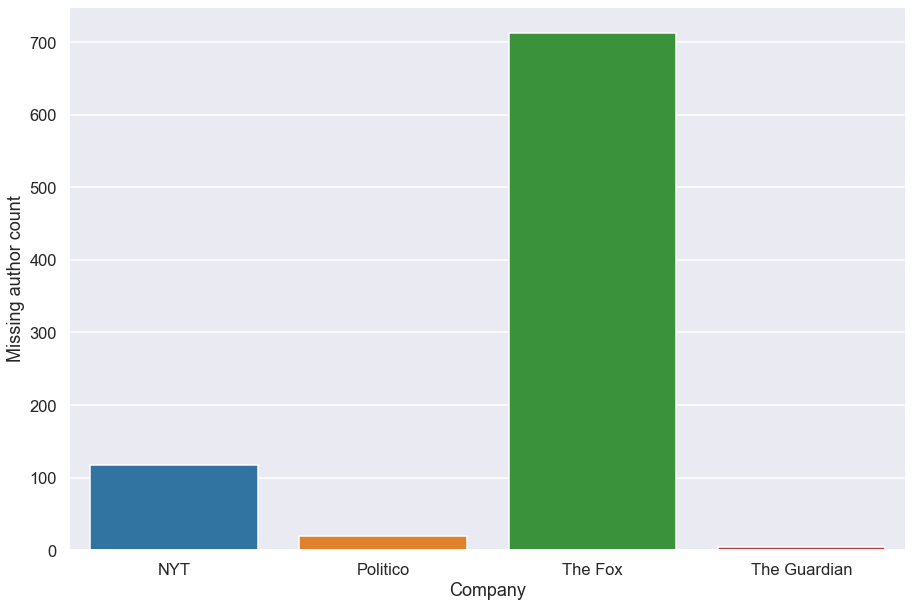

In [60]:
missing_author = df_articles[df_articles.article_author.isna()]
missing_author = missing_author.groupby(['company_id']).count()

fig,ax = plt.subplots(1,1,figsize=(15,10))
sns.barplot(x=missing_author.index,y=missing_author.article_heading,ax=ax)
ax.set_ylabel("Missing author count")
ax.set_xlabel("Company")
# missing_author

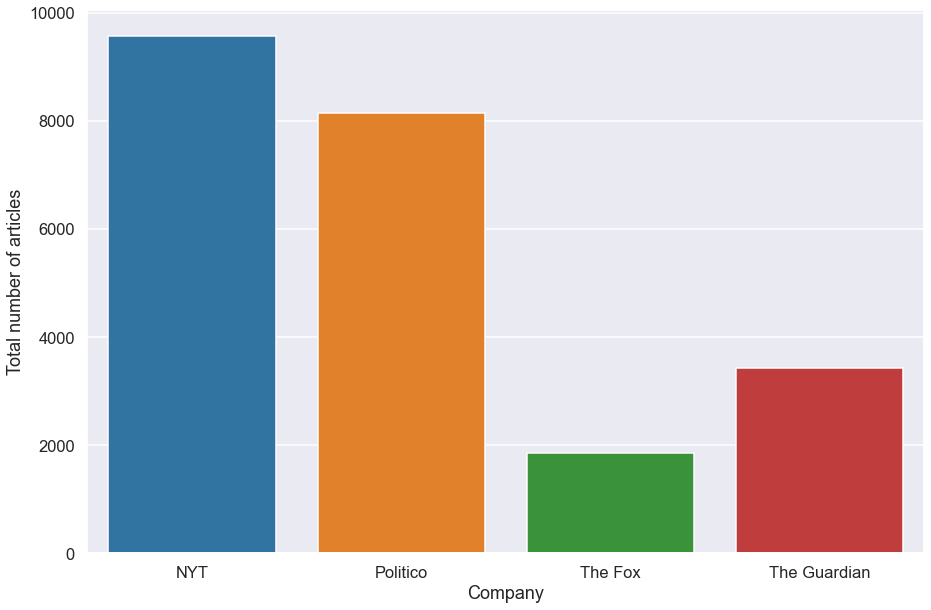

In [61]:
breakdown = df_articles.groupby(['company_id']).count()

sns.set_context("talk")
sns.set_style('darkgrid')
fig,ax = plt.subplots(1,1,figsize=(15,10))
sns.barplot(x=breakdown.index,y=breakdown.article_heading,ax=ax)
ax.set_ylabel("Total number of articles")
ax.set_xlabel("Company")
# missing_author
plt.savefig('Article Breakdown.jpeg')

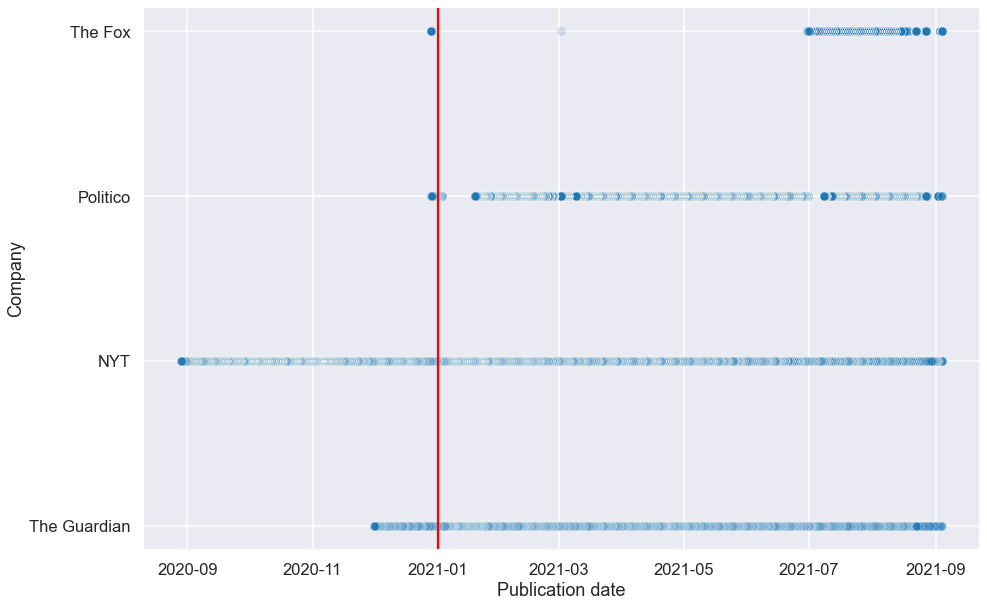

In [62]:
sns.set_context("talk")
sns.set_style('darkgrid')
fig,ax = plt.subplots(1,1,figsize=(15,10))
sns.scatterplot(x=df_articles.article_published_on,y=df_articles.company_id,ax=ax,markers=False,alpha=0.2)
plt.axvline(x=datetime(year=2021,day=1,month=1),color='r')
ax.set_ylabel("Company")
ax.set_xlabel("Publication date")
# missing_author
plt.savefig('articles distribution.jpeg')

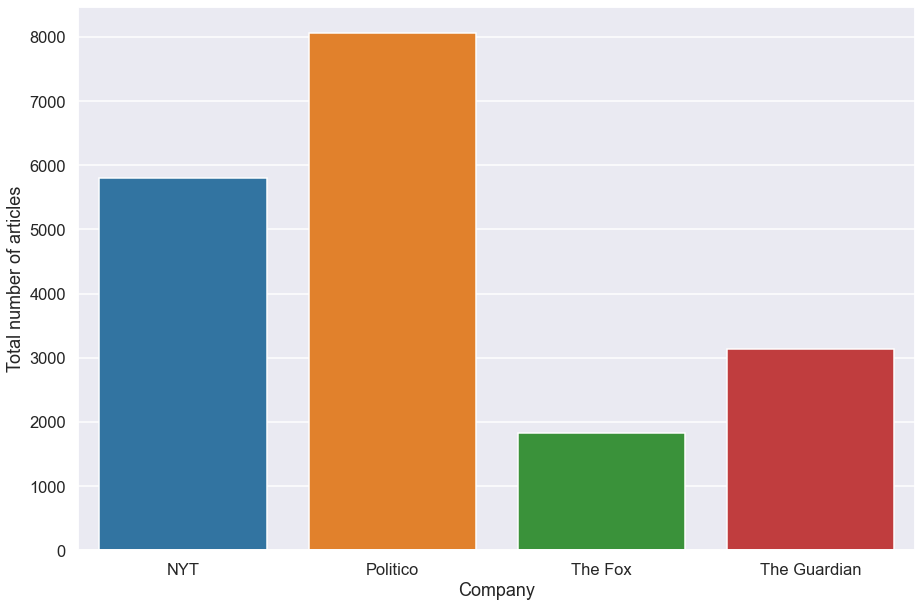

In [64]:
breakdown = df_articles[df_articles.article_published_on>datetime(year=2021,day=1,month=1)].groupby(['company_id']).count()

sns.set_context("talk")
sns.set_style('darkgrid')
fig,ax = plt.subplots(1,1,figsize=(15,10))
sns.barplot(x=breakdown.index,y=breakdown.article_heading,ax=ax)
ax.set_ylabel("Total number of articles")
ax.set_xlabel("Company")
# missing_author
plt.savefig('Article Breakdown_2.jpeg')

In [65]:
df_articles_2021 = df_articles[df_articles.article_published_on>datetime(year=2021,day=1,month=1)].copy()

In [66]:
df_articles_2021.loc[:,"month_published"] = df_articles_2021.article_published_on.dt.month
df_articles_2021.loc[:,"year_published"] = df_articles_2021.article_published_on.dt.year

In [67]:
df_articles_plot = df_articles_2021.groupby(['year_published','month_published','company_id']).agg({'article_heading':['count']})
df_articles_plot = df_articles_plot.reset_index(level=2)

In [68]:
df_articles_plot.index

MultiIndex([(2021, 1),
            (2021, 1),
            (2021, 1),
            (2021, 2),
            (2021, 2),
            (2021, 2),
            (2021, 3),
            (2021, 3),
            (2021, 3),
            (2021, 3),
            (2021, 4),
            (2021, 4),
            (2021, 4),
            (2021, 5),
            (2021, 5),
            (2021, 5),
            (2021, 6),
            (2021, 6),
            (2021, 6),
            (2021, 6),
            (2021, 7),
            (2021, 7),
            (2021, 7),
            (2021, 7),
            (2021, 8),
            (2021, 8),
            (2021, 8),
            (2021, 8),
            (2021, 9),
            (2021, 9),
            (2021, 9),
            (2021, 9)],
           names=['year_published', 'month_published'])

In [69]:
df_articles_plot.index = df_articles_plot.index.map(lambda x: f"{x[0]}/{x[1]}")
df_articles_plot.columns = df_articles_plot.columns.map('_'.join).str.strip('_')

In [70]:
df_articles_plot.index

Index(['2021/1', '2021/1', '2021/1', '2021/2', '2021/2', '2021/2', '2021/3',
       '2021/3', '2021/3', '2021/3', '2021/4', '2021/4', '2021/4', '2021/5',
       '2021/5', '2021/5', '2021/6', '2021/6', '2021/6', '2021/6', '2021/7',
       '2021/7', '2021/7', '2021/7', '2021/8', '2021/8', '2021/8', '2021/8',
       '2021/9', '2021/9', '2021/9', '2021/9'],
      dtype='object')

In [71]:
df_articles_plot.isna().sum()

company_id               0
article_heading_count    0
dtype: int64

In [72]:
df_articles_plot.index.values

array(['2021/1', '2021/1', '2021/1', '2021/2', '2021/2', '2021/2',
       '2021/3', '2021/3', '2021/3', '2021/3', '2021/4', '2021/4',
       '2021/4', '2021/5', '2021/5', '2021/5', '2021/6', '2021/6',
       '2021/6', '2021/6', '2021/7', '2021/7', '2021/7', '2021/7',
       '2021/8', '2021/8', '2021/8', '2021/8', '2021/9', '2021/9',
       '2021/9', '2021/9'], dtype=object)

In [73]:
mean_values = df_articles_plot.groupby(['company_id']).mean()
mean_values

,article_heading_count
company_id,
NYT,645.222222
Politico,896.333333
The Fox,365.200000
The Guardian,348.666667


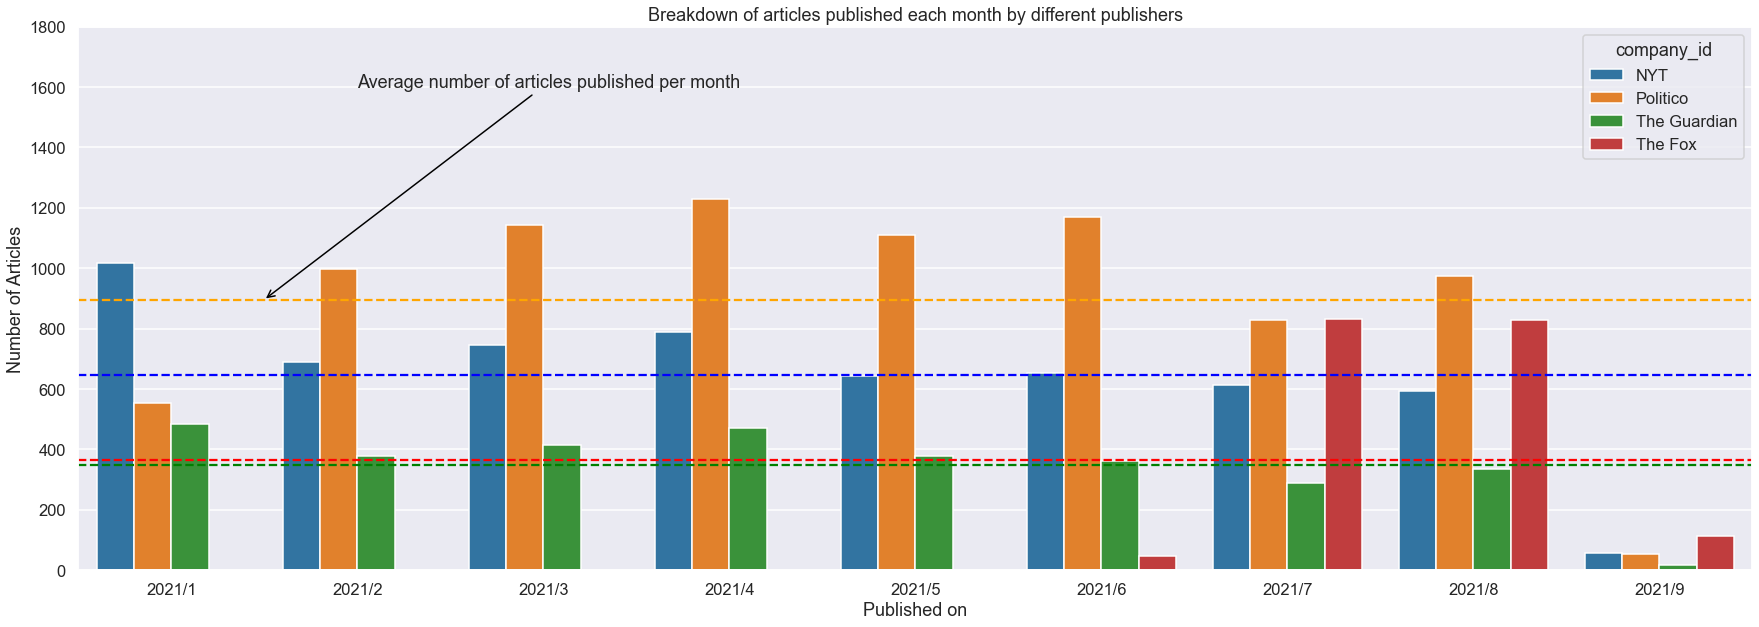

In [74]:
import matplotlib.pyplot as plt
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(30, 10))
sns.set_context
sns.barplot(x=df_articles_plot.index.values,y=df_articles_plot.article_heading_count,hue=df_articles_plot.company_id,ax=ax)
plt.axhline(y=mean_values.loc["NYT",:][0],color='b',linestyle='--')
plt.axhline(y=mean_values.loc["Politico",:][0],color='orange',linestyle='--')
plt.axhline(y=mean_values.loc["The Fox",:][0],color='red',linestyle='--')
plt.axhline(y=mean_values.loc["The Guardian",:][0],color='g',linestyle='--')
ax.annotate("Average number of articles published per month",
            xy=(0.5, mean_values.loc["Politico",:][0]), xycoords='data',
            xytext=(1, 1600), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",color='black'),
            )
ax.set_ylim(top=1800)
sns.set_context('talk')
ax.set_xlabel("Published on")
ax.set_ylabel("Number of Articles")
ax.set_title("Breakdown of articles published each month by different publishers")
plt.savefig('monthly breakdown.jpeg')

## Save processed data 

In [75]:
df_articles_2021.to_csv("../data/interim/articles_processed_9_3_2021.csv",index=False)